# Back Marketing Study
**Overview:**

This is an exersice where I start learning and practicing the basics of Machine Learning. The original work for this can be found at: https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall

The main goal of this excersice is to forecast if a bank client is going to acquire a new banking product. The data contain information about the client, as the status, the economic history aswell the campaings done for them. 

Some changes has been made in order to simplify the code. 

#` Code Preparation`
Here is where we import and update the data.

the data was uploaded to the Google Drive folder aswell as the google Colab project has been created.

In [1]:
#importing Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Reading the data**

Panda Library has been used to import the data. 

If you are going to use the same method you must:


1.   Upload the data to a folder in your google drive
2.   Mount google drive to the project
3.   Get the address to the file (by right clicking on the google drive file)




In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank/Bank marketing/bank-additional-full.csv', sep=';')
y = pd.get_dummies(df1['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [3]:
#Use Head to identify the correct dataset upload. It also is good to know examples of the data
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#info() shows info about the data, if there is any null it will mention. Can be found with .anynull().any()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#Exploratory data analysis
**Categorize the data.**

Get the Coulms names so we can categorize the data by the type of information.



In [5]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**Sorting by information**

1.   Client data
2.   Contanct Campaing info
3.   Other atributes
4.   Social and economic context
5.   Output variable



In [6]:
#1. Client data: information related to the customer.
client=df1.iloc[:,0:7]
client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


Now get to know the *categorical variables*

In [7]:
#Types of jobs
print('Jobs:\n', client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [8]:
#Marital status
print('Marital:\n', client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [9]:
#Education level
print('Education:\n', client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


It can be continued to the Loan column

*It is important to know abnormal values**

In [10]:
print('Min Age: ', client['age'].min())
print('Max Age: ', client['age'].max())
print('Null Values: ', client['age'].isnull().any())

Min Age:  17
Max Age:  98
Null Values:  False


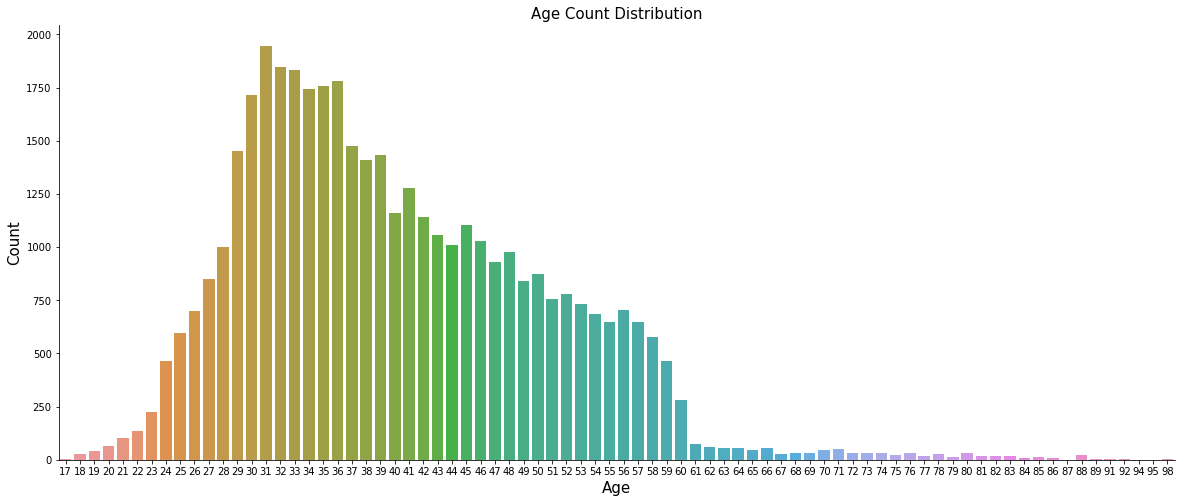

In [11]:
#ploting the client age data.
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x= 'age', data= client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()


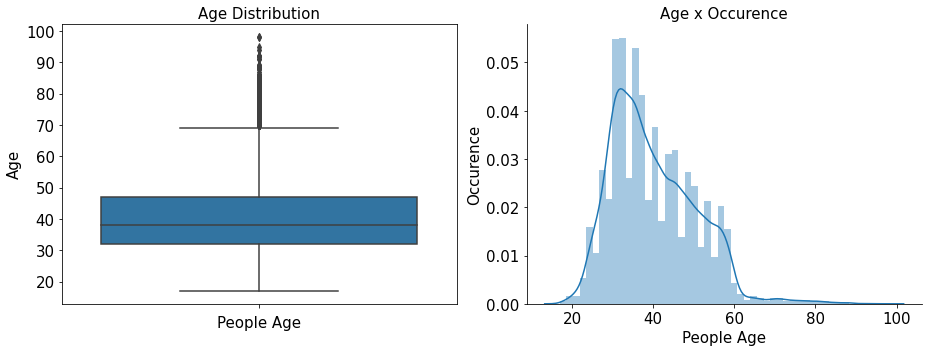

In [12]:
#compare the Age distribution with the occurence
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols=2, figsize=(13,5))
sns.boxplot(y= 'age', data=client, orient='v', ax=ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(client['age'], ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('People Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

**Identify the age data in a segmented way**

Identify the quartiles which mean that the data will be segmented to the 25, 50, 75% and the outliers. 

The 25%  (Q1) is defined as the middle number between the smalest number and de median. 

the second quartile (Q2) is the median of a data set.50% of the data lies below this point.

The third quartile (Q3) is the middle between the median and the highest value of the data set. 

For last, the outliers are the samples often treated as the errors



In [13]:
print('Q1: ', client['age'].quantile(q = 0.25))
print('Q2: ', client['age'].quantile(q = 0.50))
print('Q3: ', client['age'].quantile(q = 0.75))
print('Q4: ', client['age'].quantile(q = 1.00))
print('Above: ', client['age'].quantile(q = 0.75) + 1.5*(client['age'].quantile(q = 0.75)- client['age'].quantile(q = 0.25)), 'outliers')

Q1:  32.0
Q2:  38.0
Q3:  47.0
Q4:  98.0
Above:  69.5 outliers


As an abreviation of the process there is a funcion call describe().


Which can reduce the amount of code, as we can see on next step.

In [14]:
client.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


Calculating some values to evaluete this independent variable

A low standard deviation indicates that the data points tend to be close to the mean or expected value.

A high standard deviation indicates that the data points are scattered
I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100

   cv < 15%, low dispersion

   cv > 30%, high dispersion
   

In [15]:
#CV=(client['age'].std()*100/client['age'].mean)
print('CV = ', round(client['age'].std()*100/client['age'].mean(), 1))
#print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

CV =  26.0


**Analyzing the jobs**

Identifying the jobs clients have. 


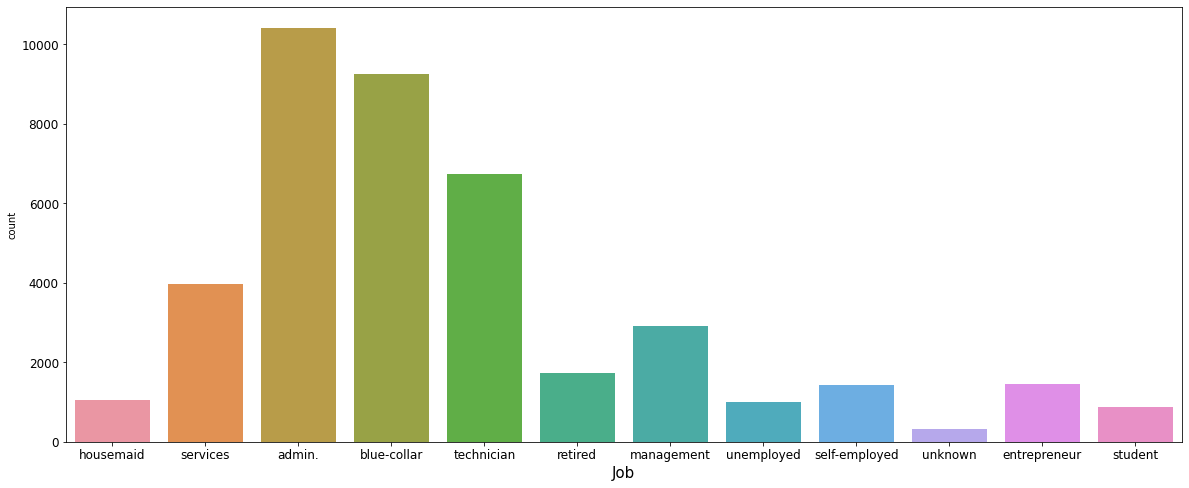

In [16]:
fig, ax =plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x='job', data=client)
ax.set_xlabel('Job', fontsize=15)
ax.tick_params(labelsize=12)


**Identify if the client has any credit**


default, has credit in default? 

Text(0.5, 0, ' ')

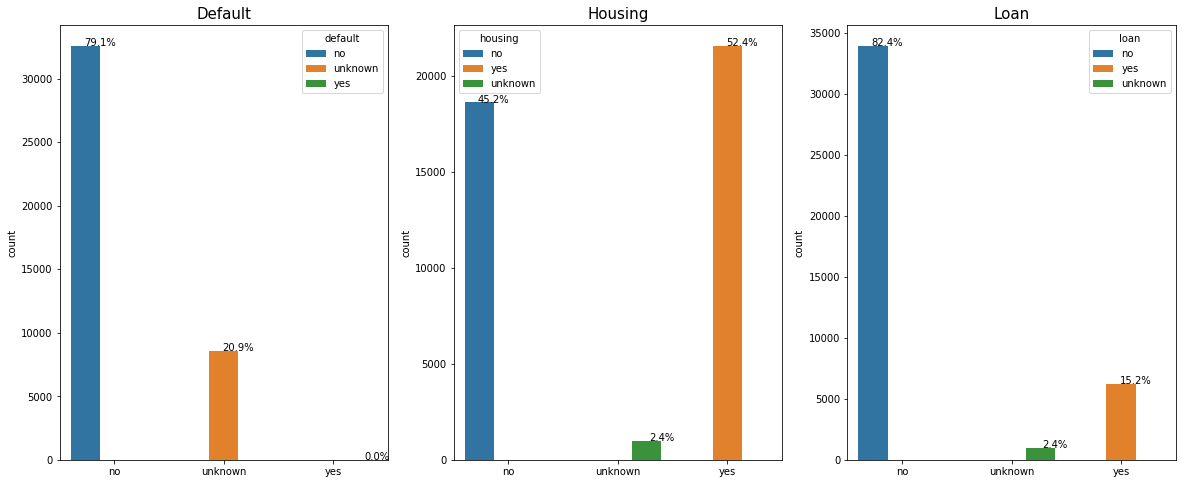

In [17]:

from matplotlib.patches import ConnectionPatch
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20,8))

order =  ['no' , 'unknown', 'yes']
total = len(client)
sns.countplot(x= 'default', data= client, ax = ax1, hue='default', order = order )

for p in ax1.patches:
  nval = '{:.1f}%'.format(100 * p.get_height()/total)
  vx = p.get_x() + p.get_width()
  vy = p.get_height()
  ax1.annotate(nval, (vx, vy),ha='center')
#plt.show()
ax1.set_title('Default', fontsize =15)
ax1.set_xlabel(' ')

sns.countplot(x = 'housing', hue='housing', data= client, ax=ax2,  order = ['no' , 'unknown', 'yes'])
for p in ax2.patches:
  nval = '{:.1f}%'.format(100 * p.get_height()/total)
  vx = p.get_x() + p.get_width()
  vy = p.get_height()
  ax2.annotate(nval, (vx, vy),ha='center')
ax2.set_title('Housing', fontsize =15)
ax2.set_xlabel(' ')

sns.countplot(x = 'loan', hue='loan', data= client, ax= ax3,  order = ['no' , 'unknown', 'yes'])

for p in ax3.patches:
  nval = '{:.1f}%'.format(100 * p.get_height()/total)
  vx = p.get_x() + p.get_width()
  vy = p.get_height()
  ax3.annotate(nval, (vx, vy),ha='center')
ax3.set_title('Loan', fontsize =15)
ax3.set_xlabel(' ')


**Encode Label**

In order to standarize the data and get a better use of it, we encode the values.

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
client['job'] =labelencoder_X.fit_transform(client['job'])
client['marital'] =labelencoder_X.fit_transform(client['marital'])
client['education'] =labelencoder_X.fit_transform(client['education'])
client['default'] =labelencoder_X.fit_transform(client['default'])
client['housing'] =labelencoder_X.fit_transform(client['housing'])
client['loan'] =labelencoder_X.fit_transform(client['loan'])

In [19]:
#grouping the ages 
def age(dataframe):
    dataframe.loc[dataframe['age']<=32, 'age']=1
    dataframe.loc[(dataframe['age']>32) & (dataframe['age']<=47), 'age']=2
    dataframe.loc[(dataframe['age']>47) & (dataframe['age']<=70), 'age']=3
    dataframe.loc[(dataframe['age']>70) & (dataframe['age']<=98), 'age']=4
    return dataframe        
age(client);

In [20]:
client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [22]:
#It is important to know how many values has the dataset.
print(client.shape)

(41188, 7)


**Manualy way to convert Categorical in Continuous**
*This has been token from the guide in order to share the work made by the autor.*

```
# This is formatted as code
bank_client['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

bank_client['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

bank_client['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

bank_client['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
```

A way to Converting Categorical variables using dummies if you judge necessary



```
# This is formatted as code
bank_client = pd.get_dummies(data = bank_client, columns = ['job'] , prefix = ['job'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['education'], prefix = ['education'], drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['default'] , prefix = ['default'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['loan'] , prefix = ['loan'] , drop_first = True)
```




**Grouping the data related to calls**

Treat data separately would make easier to understand the behaviour.  

It can be denote a relation of the contact duration with the product acquisition, if there's any.

In [23]:
client_related=df1.iloc[:, 7:11]
client_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


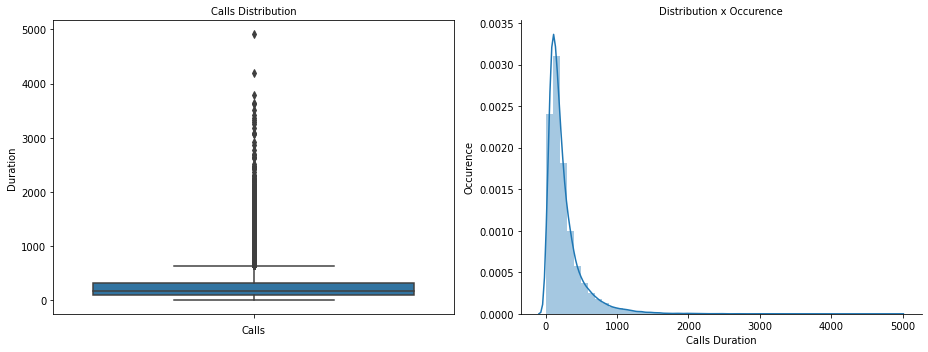

In [24]:
#ploting the duration
fig, (ax1 , ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.boxplot(y= 'duration', data= client_related, orient= 'v', ax =ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(client_related['duration'], ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Calls Duration', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Distribution x Occurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [25]:
#statistics information
client_related['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [29]:
#unique values
client_related['duration'].nunique()

1544

**Calculate the outliers:**

   Interquartile range, IQR = Q3 - Q1

   lower 1.5*IQR whisker = Q1 - 1.5 * IQR 

   Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

In [30]:
duration_out=client_related['duration'].quantile(q = 0.75) + 1.5*(client_related['duration'].quantile(q = 0.75) - client_related['duration'].quantile(q = 0.25))
print('Calls above: ', duration_out, 'seconds are outliers')

Calls above:  644.5 seconds are outliers


In [31]:
cant_out=client_related[client_related['duration'] > 644.5]['duration'].count()
out_rel=(cant_out*100)/len(client_related)
print('outliers are: ', round(out_rel,2), '%')

outliers are:  7.19 %


In [32]:
#any call with 0 duration?. If so, it means that client didn't subscribe
df1[(df1['duration']==0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


Encode Y to 0 and 1, so We can try to find a correlation value between the call duration and the product acquisition

In [33]:
labelencoder_Y = LabelEncoder()
df2=df1
df2['y'] = labelencoder_Y.fit_transform(df2['y'])
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


*Looking for correlation between duration and y (product acquisition)*

which is less than the 50% so it is assumed as no correlation

In [34]:
r=np.corrcoef(df1['duration'], df1['y'])
print(r)

[[1.        0.4052738]
 [0.4052738 1.       ]]


**Count and identification of contacts. Conctact method, month and day of week**

This would help to identify if there is a relation between the contact date, device and the product acquisition.

Text(0, 0.5, '')

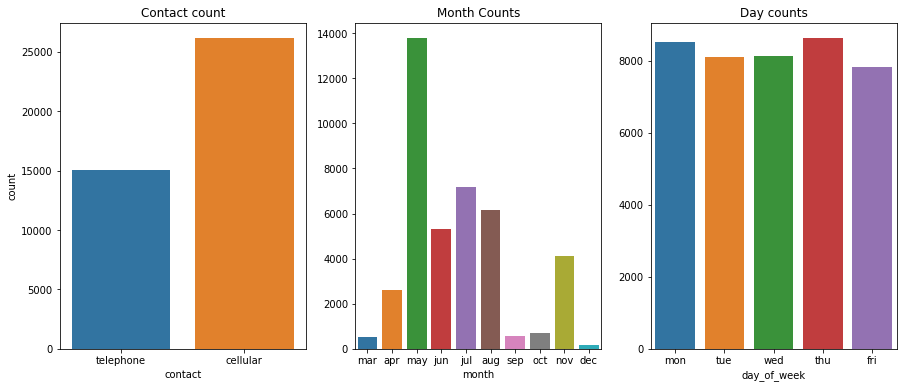

In [35]:
fig, (ax1, ax2, ax3)= plt.subplots(nrows=1 , ncols= 3, figsize = (15,6))
sns.countplot(client_related['contact'], ax =ax1)
ax1.set_title('Contact count')

sns.countplot(client_related['month'], ax = ax2, order= ['mar', 'apr', 'may', 'jun', 'jul' , 'aug', 'sep', 'oct', 'nov','dec'])
ax2.set_title('Month Counts')
ax2.set_ylabel('')

sns.countplot(client_related['day_of_week'], ax=ax3)
ax3.set_title('Day counts')
ax3.set_ylabel('')

In [36]:
#dont know what is this for:
client_related[client_related['duration']> 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

We will encoude the data related to contact, so we can do a better data handling.

In [37]:
labelencoder_X= LabelEncoder()
client_related['contact'] = labelencoder_X.fit_transform(client_related['contact'])
client_related['month'] = labelencoder_X.fit_transform(client_related['month'])
client_related['day_of_week'] = labelencoder_X.fit_transform(client_related['day_of_week'])
client_related.head()


,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [38]:
#I made a correlational aproximation between the day of the week and the product acquisition.
#Had no luck- Look ahead.

r=np.corrcoef(client_related['day_of_week'],df2['y'] )
print(r)

[[1.         0.01596719]
 [0.01596719 1.        ]]


In [39]:
#Reducing amount of duration calls values, would help to correlate the data
def duration(data):

    data.loc[data['duration']<=102 , 'duration']=1
    data.loc[(data['duration']>102) & (data['duration']<=180) , 'duration']=2
    data.loc[(data['duration']>180) & (data['duration']<=319) , 'duration']=3
    data.loc[(data['duration']>319) & (data['duration']<=644.5) , 'duration']=4
    data.loc[data['duration']>644.5 , 'duration']=5

    return data
duration(client_related)

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3
...,...,...,...,...
41183,0,7,0,4
41184,0,7,0,4
41185,0,7,0,3
41186,0,7,0,4


**Indentifying Social an Economic Context attributes**

As we can see the dataset is about banking and credit aquisition, so it is important to care about some economic, and conext attributes.

In [40]:

client_se = df2.loc[:, ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed']]
client_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


**Other atributtes**

It is also important to care about the campaings done in the past, and its results.

In [41]:
client_ot = df1.loc[ : , ['campaign','pdays','previous','poutcome']]
client_ot.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [42]:
client_ot['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [43]:
client_ot['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

# **Create the Model**

Once we understand and did a series of data analysis and structuration, we start to create the model so we can use the different aproximation methods in order to forecast the client behavior.

In [44]:
client_final = pd.concat([client, client_related,client_se,client_ot], axis=1)
client_final  = client_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
                    
client_final.shape
#client_final.head()

(41188, 20)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(client_final, y, test_size=0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
38912,3,5,1,6,0,2,0,0,7,4,5,-3.4,92.649,-30.1,0.716,5017.5,2,3,3,3
9455,2,7,1,5,1,0,0,1,4,0,2,1.4,94.465,-41.8,4.967,5228.1,1,999,0,1
14153,1,4,1,6,0,2,0,0,3,1,5,1.4,93.918,-42.7,4.962,5228.1,3,999,0,1
25021,3,6,1,6,0,2,0,0,7,3,1,-0.1,93.200,-42.0,4.153,5195.8,1,999,0,1
30911,2,5,0,0,0,2,2,0,6,3,3,-1.8,92.893,-46.2,1.344,5099.1,2,999,1,2


In [46]:
from sklearn.preprocessing import StandardScaler
sc_X =StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression()
lgmodel.fit(X_train,y_train)

lgpred=lgmodel.predict(X_test)

print(confusion_matrix(y_test, lgpred))
print(round(accuracy_score(y_test,lgpred),2)*100)
LOGVC = (cross_val_score(lgmodel,X_train,y_train, cv=k_fold,n_jobs=1,scoring='accuracy').mean())

[[6909  164]
 [ 598  329]]
90.0


k=1 87.84 (+/- 0.59)
k=2 89.73 (+/- 0.50)
k=3 89.69 (+/- 0.49)
k=4 90.02 (+/- 0.51)
k=5 89.98 (+/- 0.41)
k=6 90.07 (+/- 0.47)
k=7 90.24 (+/- 0.41)
k=8 90.28 (+/- 0.48)
k=9 90.33 (+/- 0.46)
k=10 90.35 (+/- 0.49)
k=11 90.33 (+/- 0.51)
k=12 90.32 (+/- 0.59)
k=13 90.37 (+/- 0.51)
k=14 90.40 (+/- 0.48)
k=15 90.44 (+/- 0.47)
k=16 90.41 (+/- 0.50)
k=17 90.41 (+/- 0.50)
k=18 90.38 (+/- 0.52)
k=19 90.43 (+/- 0.45)
k=20 90.38 (+/- 0.48)
k=21 90.42 (+/- 0.46)
k=22 90.37 (+/- 0.48)
k=23 90.45 (+/- 0.44)
k=24 90.34 (+/- 0.49)
k=25 90.44 (+/- 0.47)
the optimal number of neighbors is 22 with 90.4%


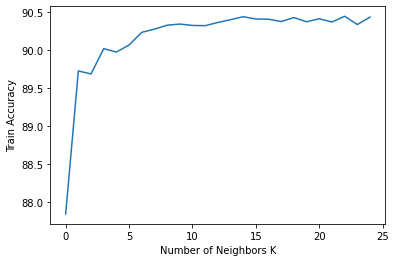

In [48]:
from sklearn import model_selection
from sklearn.neighbors import  KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK =train_test_split(client_final, y, test_size=0.2, random_state=101)

#defining Neighbors
neighbors = np.arange(0,25)

#create an empty list to store the CV scores
cv_scores=[]

#perform 10-fold validation on training set for odd values of K:

for k in neighbors:
  k_value = k+1
  knn = KNeighborsClassifier(n_neighbors= k_value, weights='uniform',p=2, metric='euclidean')
  kfold= model_selection.KFold (n_splits=10, random_state=123)
  scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
  cv_scores.append(scores.mean()*100)
  print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

#for k in neighbors:
# knn=KNeighborsClassifier(n_neighbors=k, weights='uniform',p=2,metric='euclidean')
#  kfold = KFold(n_splits=10, shuffle=True, random_state=123)
#  scores = cross_val_score(knn, X_train, y_traink.ravel(), cv=kfold, scoring='accuracy')
#  cv_scores.append(scores.mean()*100)
#  print("k-%d %0.2f (+/- %0.2f)" %(k, scores.mean()*100, scores.std()*100))

optimal_k=neighbors[cv_scores.index(max(cv_scores))]
print("the optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

[[6962  111]
 [ 684  243]]
90.0


In [50]:
from sklearn.svm import SVC
svc = SVC (kernel ='sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)

SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

[[6531  542]
 [ 584  343]]
86.0


In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') 
dtree.fit(X_train, y_train)
dtreepred=dtree.predict(X_test)

print(confusion_matrix(y_test,dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

[[6614  459]
 [ 482  445]]
88.0


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfcpred= rfc.predict(X_test)

print(confusion_matrix(y_test , rfcpred))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring= 'accuracy').mean())

[[6790  283]
 [ 493  434]]
90.0


In [53]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6272  801]
 [ 417  510]]
85.0


In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[6858  215]
 [ 512  415]]
91.0


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6826  247]
 [ 460  467]]
91.0


In [56]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGVC, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)


,Models,Score
7,Gradient Boosting,0.914306
6,XGBoost,0.913463
0,Random Forest Classifier,0.909907
4,Logistic Model,0.909666
3,K-Near Neighbors,0.904815
1,Decision Tree Classifier,0.884838
2,Support Vector Machine,0.855550
5,Gausian NB,0.844432


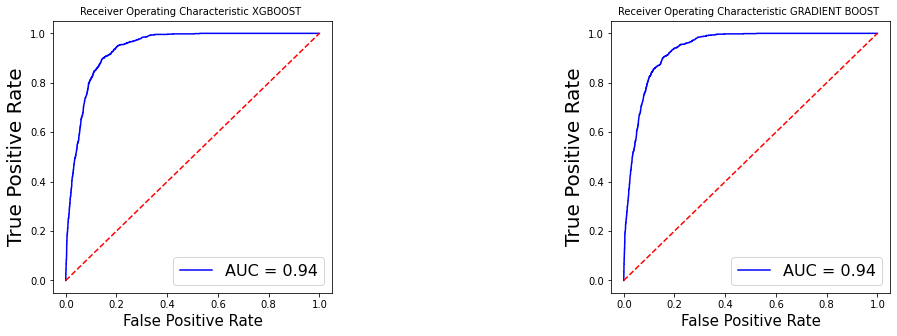

In [57]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

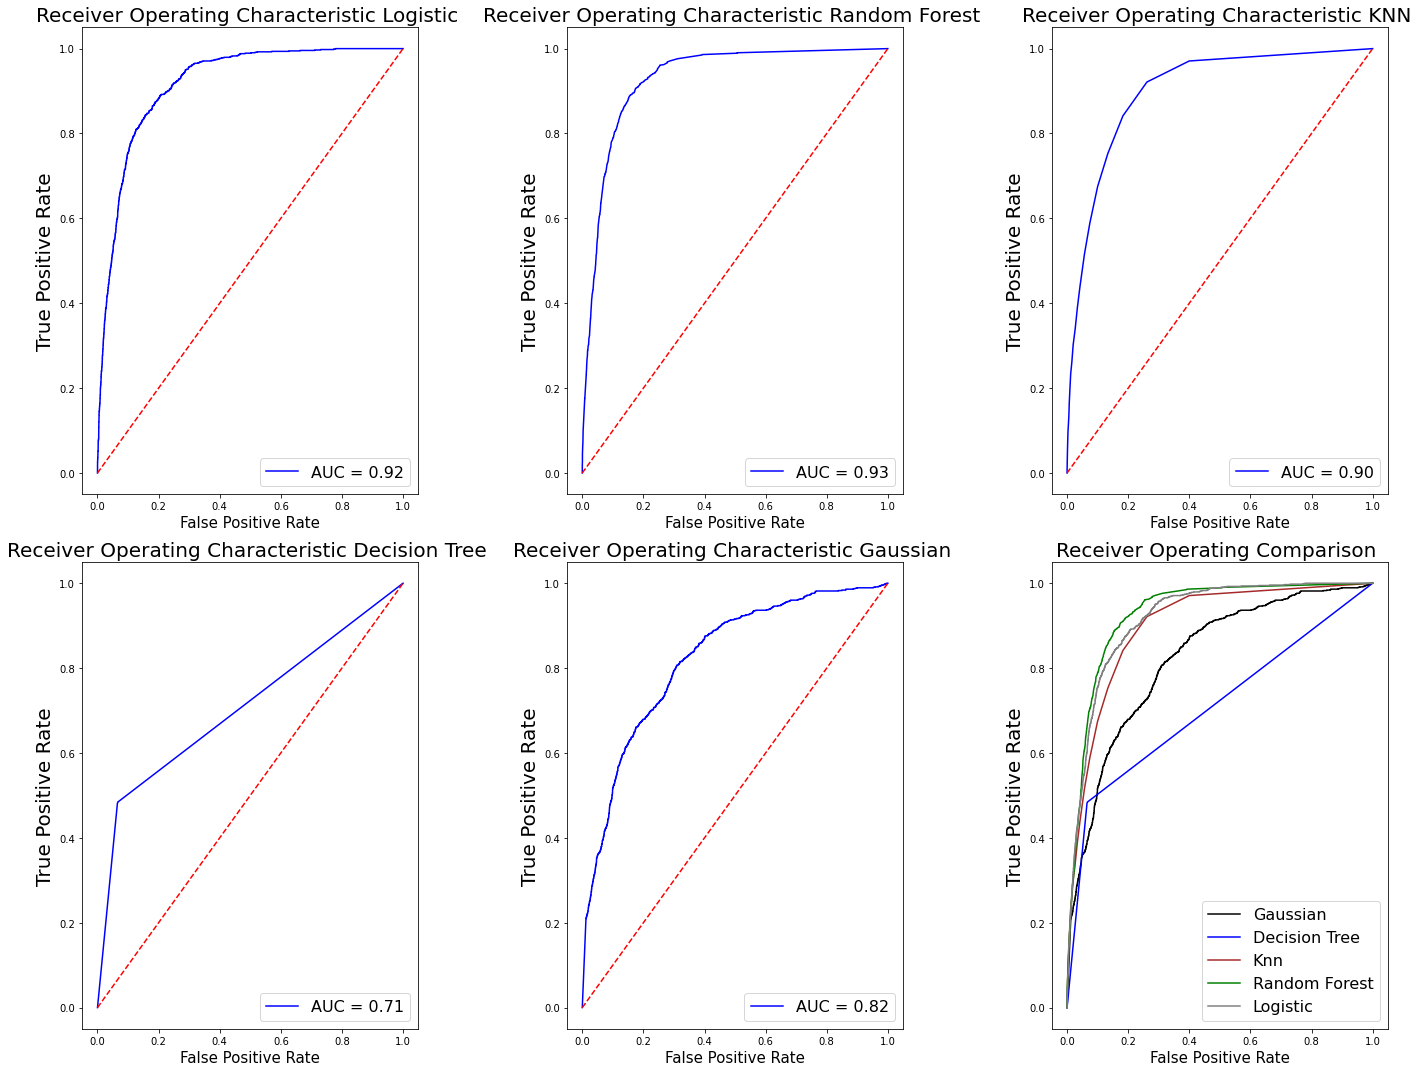

In [58]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = lgmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

# ANALYZING THE RESULTS
We are now going to decide which one is the best model, for that it is important to care about the types of wrong values show by the confussion matrix, which is sorted like this:

Rows: Actual class
Column: Predicted class

```
array([True Positive, False Positive],
      [False Negatives, True Positives])
```
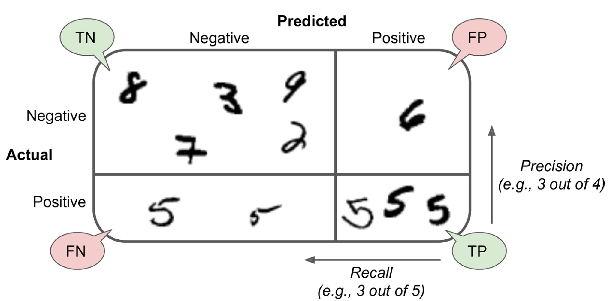

Figure took from the book of Aurelion Geron - Hans on Machine Learning with Scikit-Learn, Keras and TensorFlow (2019)

In agree to the author of the guide. "False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.

False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont."

Going deeper

The harm done by the first kind of result (False Positive) can impact more to the bank activity, because will lost a client because we think is already on suscribed.

Meanwhile the True Positives are ok, we think that the client is not subscribed but he already is. The repercusion here is to spend resources on including him on further campaings.

So now the model that is going to be selected is the one which hase the most accuracy at the lowest False Positive possible.

Obs1 - lets go back and look the best confusion matrix that attend this criteria Obs2 - i'll do the math manualy to be more visible and understanding

In [59]:
from sklearn.metrics import classification_report

In [60]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix
 [[6962  111]
 [ 684  243]]


In [61]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7073
           1       0.69      0.26      0.38       927

    accuracy                           0.90      8000
   macro avg       0.80      0.62      0.66      8000
weighted avg       0.88      0.90      0.88      8000



# Model Analysis


**Precision and Recall**

Thanks to Scikit-Learn we could use functions to compute the metrics of a model, including precision and recall.

In the case of *precision* is the index for **positive predictions**. meanwhile the *recall*, which is also called *sensitivity* or *true positive rate* (TRP) "the ratio of positive instances that are correctly detected by the classifier" - Aurelion Geron, Hands of Machine Learning.

Now it is important to understand how are both indexes measured. In the case of the *precision* is as follows:

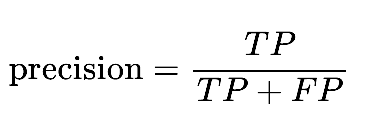

Where **TP** is the number of True Positive, and **FP* is number of False Positives.

Meanwhile in the case of **Recall**:

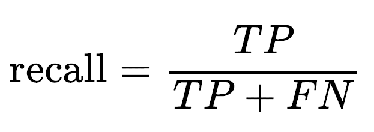

Where the **FN ** are the False Negative number.

Reference: Hands-on Machine Learning, Aurelion Geron (2019)


By other side there is an Index that can include bothe the Precision and Recall values, Which is called **F1 Score** as the simple way to compare both classifiers. This metric is the *harmonic mean* of precision and recall. 

The metric value can be obtain by using the following eq:
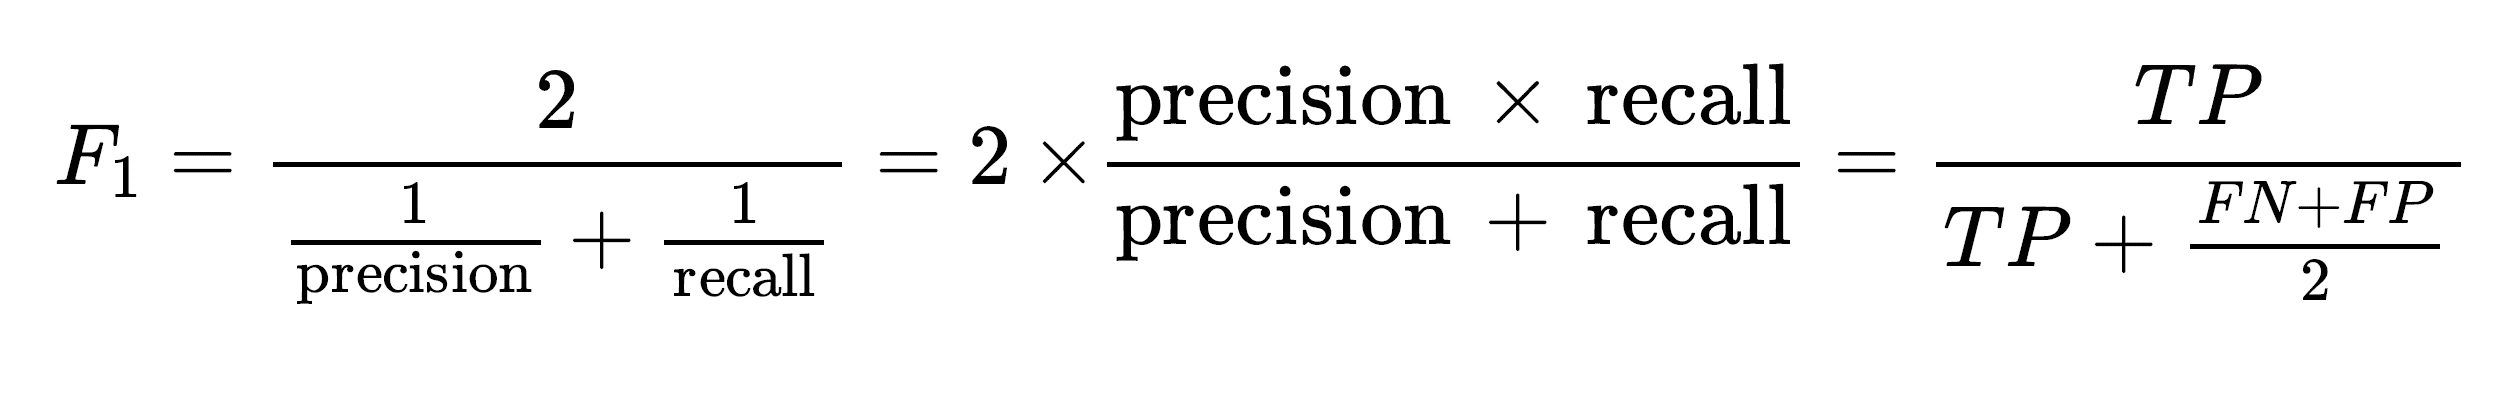


In [64]:
from sklearn.metrics import f1_score

In [65]:
print('KNN Reports\n',classification_report(y_test, knnpred))
print('\n')
print('Gradient Boosting Reports\n',classification_report(y_test, gbkpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7073
           1       0.69      0.26      0.38       927

    accuracy                           0.90      8000
   macro avg       0.80      0.62      0.66      8000
weighted avg       0.88      0.90      0.88      8000



Gradient Boosting Reports
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7073
           1       0.65      0.50      0.57       927

    accuracy                           0.91      8000
   macro avg       0.80      0.73      0.76      8000
weighted avg       0.90      0.91      0.91      8000

